# Health Data Science Test Functions

Basic notebook to test extensions and core data science functionality

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Basic Health Functions

def calculate_bmi(weight_kg, height_m):
    """Calculate Body Mass Index"""
    return weight_kg / (height_m ** 2)

def calculate_ideal_heart_rate_max(age):
    """Calculate estimated max heart rate using Tanaka formula"""
    return 208 - (0.7 * age)

def calculate_caloric_needs(weight_kg, height_cm, age, gender, activity_level=1.5):
    """Estimate daily caloric needs using Mifflin-St Jeor equation"""
    if gender.lower() == 'male':
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age + 5
    else:
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age - 161
    return bmr * activity_level

# Test the functions
print("Sample Calculations:")
print(f"BMI (70kg, 1.75m): {calculate_bmi(70, 1.75):.2f}")
print(f"Max Heart Rate (age 30): {calculate_ideal_heart_rate_max(30):.0f} bpm")
print(f"Daily Calories (70kg, 175cm, 30yo, male): {calculate_caloric_needs(70, 175, 30, 'male'):.0f}")

Sample Calculations:
BMI (70kg, 1.75m): 22.86
Max Heart Rate (age 30): 187 bpm
Daily Calories (70kg, 175cm, 30yo, male): 2473


In [4]:
# Create sample health data
np.random.seed(42)

data = {
    'age': np.random.randint(20, 70, 50),
    'weight_kg': np.random.normal(75, 15, 50),
    'height_m': np.random.normal(1.75, 0.1, 50),
    'steps': np.random.randint(5000, 15000, 50),
    'resting_heart_rate': np.random.randint(60, 100, 50)
}

df = pd.DataFrame(data)
df['bmi'] = df.apply(lambda row: calculate_bmi(row['weight_kg'], row['height_m']), axis=1)
df['max_hr'] = df['age'].apply(calculate_ideal_heart_rate_max)

print(df.head())
print(f"\nDataFrame shape: {df.shape}")
print(f"\nBasic statistics:\n{df.describe()}")

   age  weight_kg  height_m  steps  resting_heart_rate        bmi  max_hr
0   58  79.365510  1.696558   6930                  97  27.573647   167.4
1   48  65.466604  1.600495  11287                  99  25.557089   174.4
2   34  59.676717  1.671074  13800                  79  21.370440   184.2
3   62  72.573669  1.824371  14339                  94  21.804830   164.6
4   27  66.995268  1.728784   9282                  84  22.416238   189.1

DataFrame shape: (50, 7)

Basic statistics:
             age   weight_kg   height_m         steps  resting_heart_rate  \
count  50.000000   50.000000  50.000000     50.000000           50.000000   
mean   43.680000   76.543176   1.741078  10177.520000           82.520000   
std    13.890887   15.671596   0.090758   2890.511975           11.128636   
min    21.000000   51.250587   1.484482   5262.000000           61.000000   
25%    33.250000   65.511913   1.693536   7416.500000           76.000000   
50%    43.000000   75.101044   1.731089  10478.50

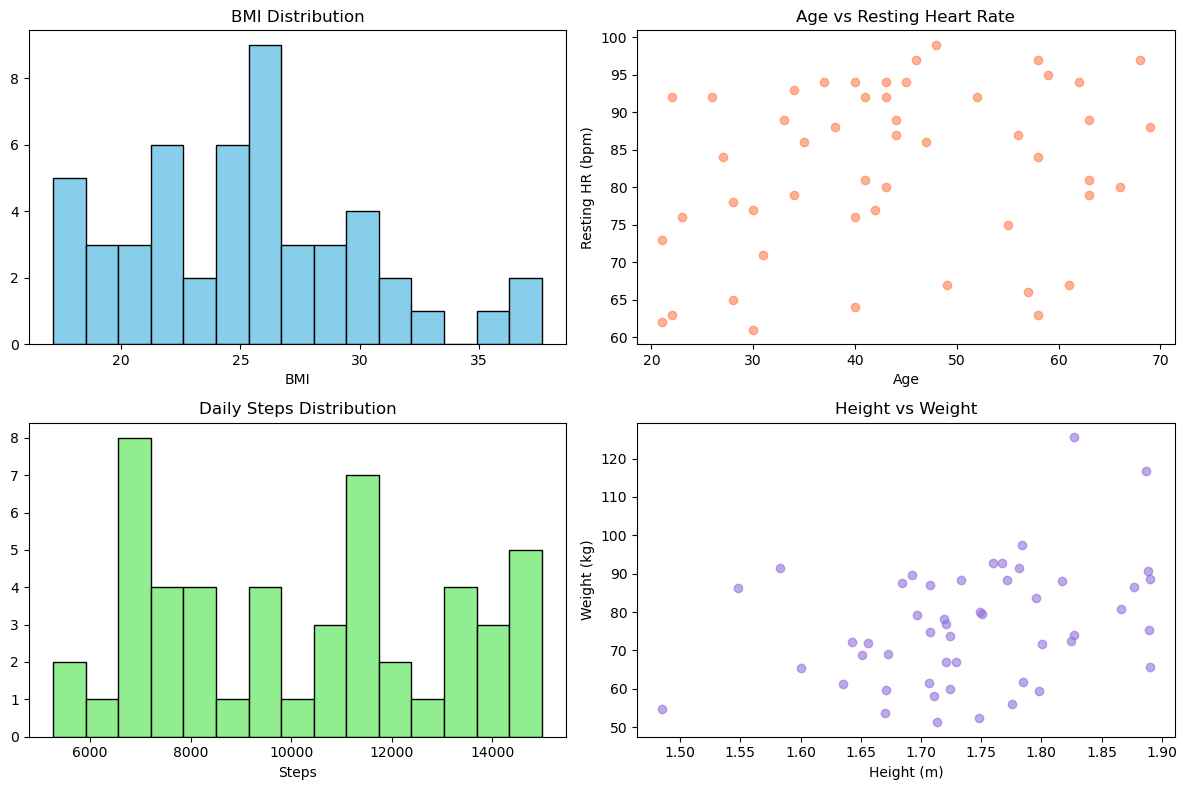

Visualization complete!


In [5]:
# Visualize the data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# BMI distribution
axes[0, 0].hist(df['bmi'], bins=15, color='skyblue', edgecolor='black')
axes[0, 0].set_title('BMI Distribution')
axes[0, 0].set_xlabel('BMI')

# Age vs Resting Heart Rate
axes[0, 1].scatter(df['age'], df['resting_heart_rate'], alpha=0.6, color='coral')
axes[0, 1].set_title('Age vs Resting Heart Rate')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Resting HR (bpm)')

# Steps distribution
axes[1, 0].hist(df['steps'], bins=15, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Daily Steps Distribution')
axes[1, 0].set_xlabel('Steps')

# Height vs Weight
axes[1, 1].scatter(df['height_m'], df['weight_kg'], alpha=0.6, color='mediumpurple')
axes[1, 1].set_title('Height vs Weight')
axes[1, 1].set_xlabel('Height (m)')
axes[1, 1].set_ylabel('Weight (kg)')

plt.tight_layout()
plt.show()

print("Visualization complete!")